C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Month  Forecasted_Sales       Lower_CI       Upper_CI
0  2025-02-01      94054.339688   65933.640432  122175.038944
1  2025-03-01     119193.077170   88988.251884  149397.902457
2  2025-04-01      93960.387926   62068.015512  125852.760340
3  2025-05-01     110937.990400   77454.083375  144421.897425
4  2025-06-01      84934.158929   49931.495901  119936.821956
5  2025-07-01      95912.480231   59454.295550  132370.664912
6  2025-08-01      97707.295163   59849.509055  135565.081270
7  2025-09-01      98717.434121   59509.976863  137924.891379
8  2025-10-01     110953.755273   70441.566484  151465.944063
9  2025-11-01     118668.145942   76891.954433  160444.337452
10 2025-12-01     106387.418143   63384.361108  149390.475177
11 2026-01-01     110776.937193   66581.058957  154972.815429
12 2026-02-01     112510.698935   65534.029013  159487.368856
13 2026-03-01     150055.030422  101458.394296  198651.666549
14 2026-04-01     104616.263481   54491.519946  154741.007015
15 2026-

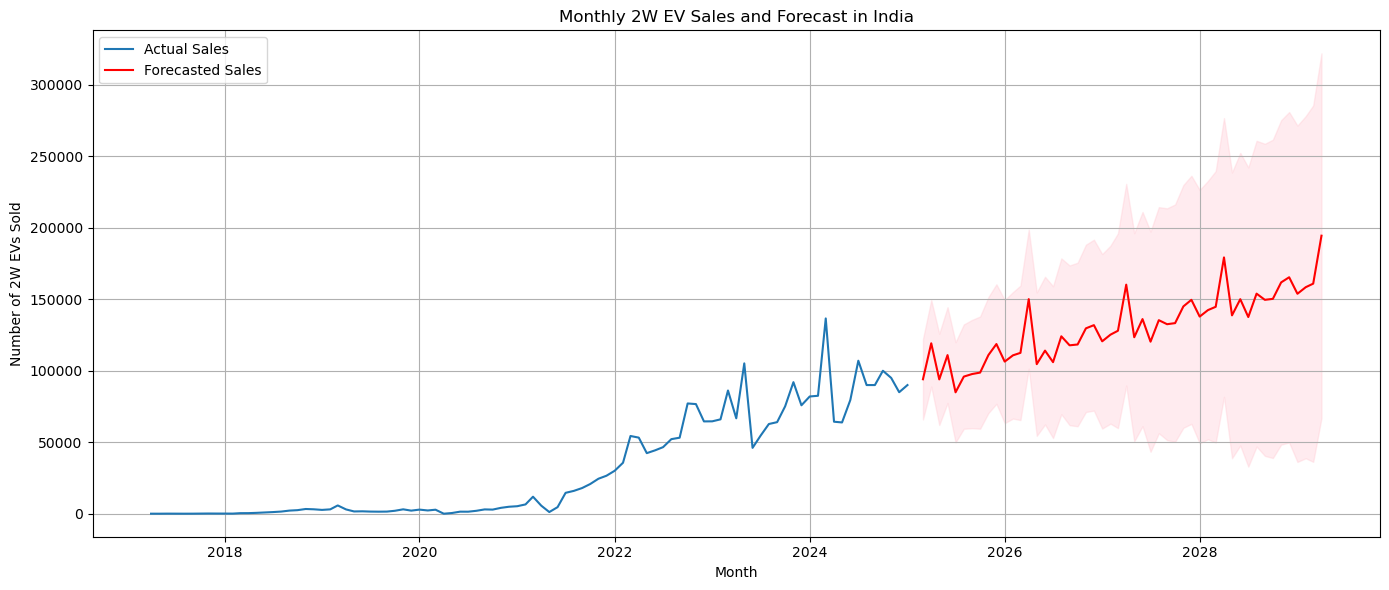

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data from Excel
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0, 1])

# Clean column names
df.columns = ['Month', 'EV_Sales']

# Remove commas and convert to integer
df['EV_Sales'] = df['EV_Sales'].astype(str).str.replace(',', '').astype(int)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Fit SARIMA model — using seasonal_order with period=12 (monthly seasonality)
sarima_model = SARIMAX(df['EV_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months (or adjust steps)
forecast_steps = 50
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Forecast index starts after the last known month
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create forecast DataFrame
# Display forecast table
forecast_df = pd.DataFrame({
    'Month': forecast_values.index,
    'Forecasted_Sales': forecast_values.values,
    'Lower_CI': forecast_conf_int.iloc[:, 0].values,
    'Upper_CI': forecast_conf_int.iloc[:, 1].values
})
print(forecast_df)

# Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['EV_Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly 2W EV Sales and Forecast in India')
plt.xlabel('Month')
plt.ylabel('Number of 2W EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()